<a href="https://colab.research.google.com/github/JesiJackson/Multiple-Linear-Regression/blob/main/Yellow_Taxi_Trip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime #Fecha y hora
from datetime import timedelta #Realiza cálculos respecto al tiempo y fecha
from datetime import date #Manipula fechas sin tiempos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [ ]:
df0.shape

(22699, 18)

In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [ ]:
df = df0.copy()

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0


In [ ]:
df.duplicated().sum()

np.int64(0)

The dataframe has 18 columns or variables, 22699 rows in which there are no duplicates or missing values.

In [ ]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


There are clearly some outliers in several variables, like **tip_amount** (\$200) and **total_amount** ($1200). Also, a number of the variables, such as 'mta_tax', seem to be almost constant throughout the data, which would imply that they would not be expected to be very predictive.

In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
print('Data type of tpep_pickup_datetime:', df['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df['tpep_dropoff_datetime'].dtype)
df['tpep_dropoff_datetime'][0]

Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


Timestamp('2017-03-25 09:09:47')

In [ ]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60
df['duration'].head(3)

,duration
0,14.066667
1,26.500000
2,7.200000


Keeping in mind that many of the features will not be used to fit the model, the most important columns to check for outliers are likely to be: trip_distance, fare_amount and duration.

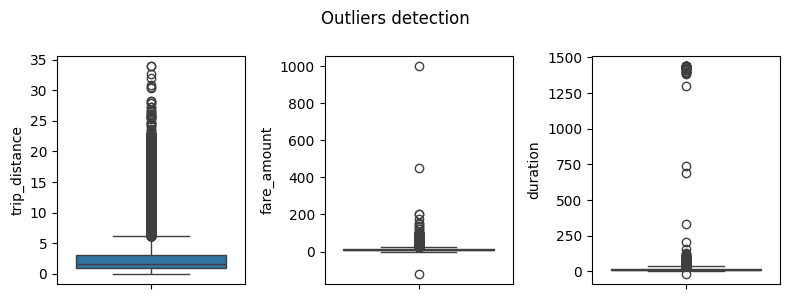

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (8,3))
fig.suptitle('Outliers detection')
sns.boxplot(df['trip_distance'], ax = ax[0])
sns.boxplot(df['fare_amount'], ax = ax[1])
sns.boxplot(df['duration'], ax = ax[2])
plt.tight_layout()

- All three variables contain outliers. Some are extreme, but others not so much.
- It's 30 miles from the southern tip of Staten Island to the northern end of Manhattan and that's in a straight line. With this knowledge and the distribution of the values in this column, it's reasonable to leave these values alone and not alter them. However, the values for fare_amount and duration definitely seem to have problematic outliers on the higher end.

From the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?
To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [ ]:
sorted(set(df['trip_distance']))[:5]

[0.0, 0.01, 0.02, 0.03, 0.04]

In [ ]:
(df['trip_distance'] == 0).sum()

np.int64(148)

148 out of ~23,000 rides is relatively insignificant. You could impute it with a value of 0.01, but it's unlikely to have much of an effect on the model. Therefore, the `trip_distance` column will remain untouched with regard to outliers.

In [ ]:
df['fare_amount'].describe()

,fare_amount
count,22699.000000
mean,13.026629
std,13.243791
min,-120.000000
25%,6.500000
50%,9.500000
75%,14.500000
max,999.990000


The range of values in the `fare_amount` column is large and the extremes don't make much sense.

**Low values:** Negative values are problematic. Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.

In [ ]:
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0
df['fare_amount'].min()

0.0

In [ ]:
def remove_outliers(column_list, iqr_factor):
  for column in column_list:
    #assign 0 as minimum value
    df.loc[df[column] < 0, column] = 0
    #interquartile range
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (iqr_factor * IQR)
    upper_bound = Q3 + (iqr_factor * IQR)
    print(column)
    print('upper_bound:', upper_bound)
    #reassign values > bound to bound
    df.loc[df[column] > upper_bound, column] = upper_bound
    print(df[column].describe())

In [ ]:
remove_outliers(['fare_amount'], 6)

fare_amount
upper_bound: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64


In [ ]:
remove_outliers(['duration'], 6)

duration
upper_bound: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64


In [ ]:
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(5)

,pickup_dropoff
0,100 231
1,186 43
2,262 236
3,188 97
4,4 112


In [ ]:
grouped = df.groupby('pickup_dropoff')['trip_distance'].mean()
grouped.head(5)

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [ ]:
grouped_dict = grouped.to_dict()
#grouped_dict

In [ ]:
df['mean_distance'] = df['pickup_dropoff']
df['mean_distance'] = df['mean_distance'].map(grouped_dict)
#Confirmation
df[(df['PULocationID'] == 100) & (df['DOLocationID'] == 100)][['mean_distance']]

,mean_distance
2805,0.253333
6878,0.253333
8197,0.253333
11626,0.253333
16359,0.253333
19225,0.253333


In [ ]:
grouped2 = df.groupby('pickup_dropoff')['duration'].mean()
grouped2_dict = grouped2.to_dict()
df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped2_dict)
#Confirmation
df[(df['PULocationID'] == 100) & (df['DOLocationID'] == 100)][['mean_duration']]

,mean_duration
2805,3.130556
6878,3.130556
8197,3.130556
11626,3.130556
16359,3.130556
19225,3.130556


In [ ]:
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()
df['month'] = df['tpep_pickup_datetime'].dt.month_name().str.lower()
df[['day','month']].head(5)

,day,month
0,saturday,march
1,tuesday,april
2,friday,december
3,sunday,may
4,saturday,april


In [ ]:
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour
df.loc[df['day'].isin(['saturday','sunday']), 'rush_hour'] = 0

def rush_time(hour):
  if 6 <= hour < 10:
    val = 1
  elif 16 <= hour < 20:
    val = 1
  else:
    val = 0
  return val

df.loc[(df['day'] != 'saturday') & (df['day'] != 'sunday'), 'rush_hour'] = df['rush_hour'].apply(rush_time)
df.head()

<ipython-input-65-55532a85b323>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0 1 1 ... 1 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[(df['day'] != 'saturday') & (df['day'] != 'sunday'), 'rush_hour'] = df['rush_hour'].apply(rush_time)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,march,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,april,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,december,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,april,0


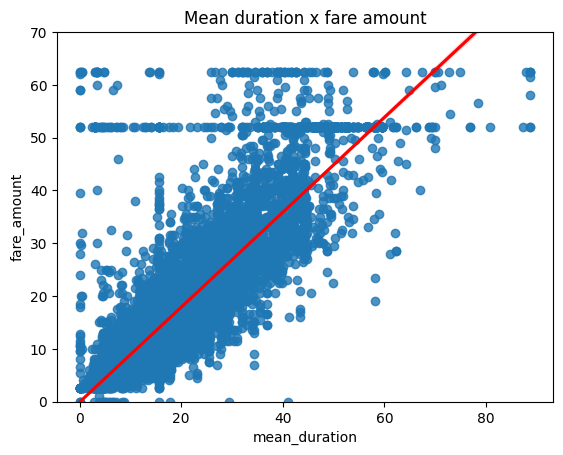

In [ ]:
sns.regplot(data = df, x = 'mean_duration', y = 'fare_amount', line_kws = {'color':'red'})
plt.ylim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

In [ ]:
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

,count
fare_amount,
52.0,514
62.5,84
59.0,9
50.5,9
57.5,8


There are 514 trips where fares were \$52.

In [ ]:
df[df['fare_amount'] == 52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,...,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,march,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,...,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,june,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,...,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,november,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,...,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,december,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,...,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,september,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,...,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,february,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,...,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,june,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,...,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,august,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,...,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,september,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,...,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,april,0


It seems that almost all of the trips in the first 30 rows where the fare amount was \$52 either begin or end at location 132, and all of them have a `RatecodeID` of 2.

There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of \$5.76 and \$5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. It's likely this is an airport.

The data dictionary says that `RatecodeID` of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A quick Google search for \"new york city taxi flat rate \\$52\" indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

Because `RatecodeID` is known from the data dictionary, the values for this rate code can be imputed back into the data after the model makes its predictions. This way you know that those data points will always be correct.

In [ ]:
df2 = df.copy()
df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'trip_distance', 'RatecodeID',
                'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'mta_tax',
                'tip_amount', 'tolls_amount', 'improvement_surcharge','total_amount', 'tpep_dropoff_datetime',
                'tpep_pickup_datetime', 'duration','pickup_dropoff', 'day', 'month'], axis = 1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


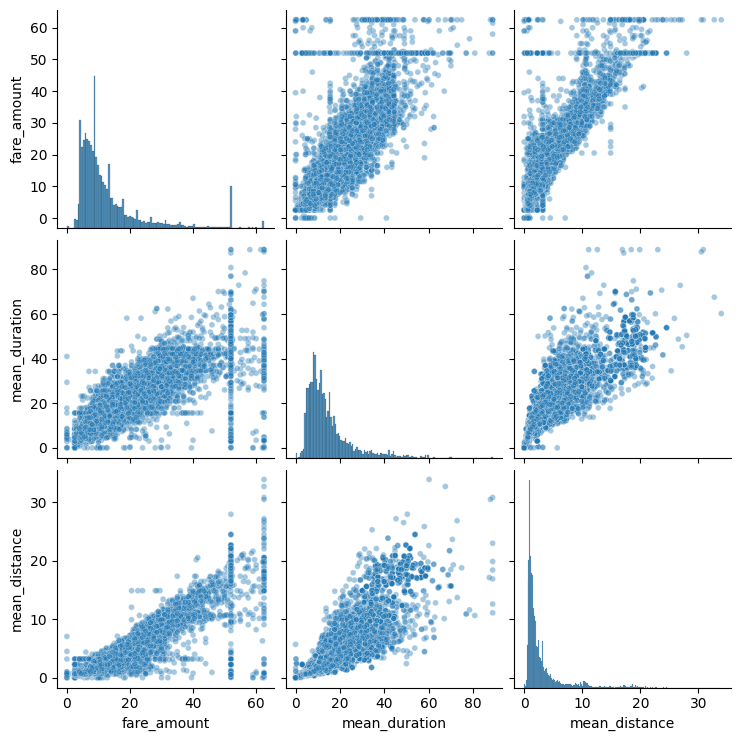

In [ ]:
sns.pairplot(df2[['fare_amount','mean_duration','mean_distance']],
             plot_kws={'alpha':0.4, 'size':5})

In [ ]:
df2.corr()

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


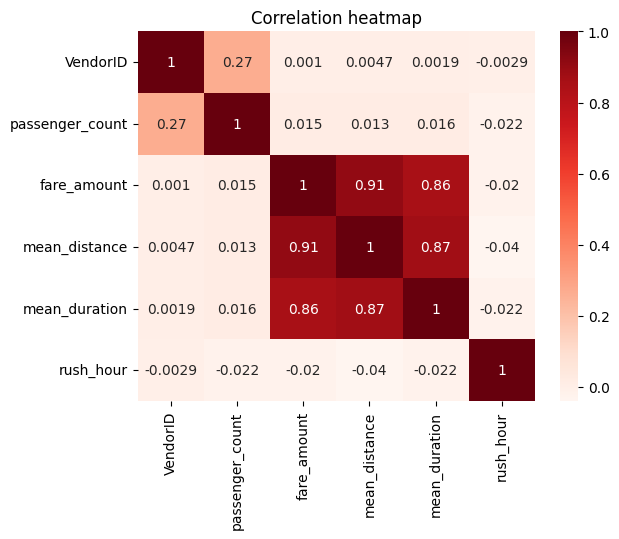

In [ ]:
sns.heatmap(df2.corr(), annot = True, cmap = 'Reds')
plt.title('Correlation heatmap')
plt.show()

`mean_duration` and `mean_distance` are both highly correlated with the target variable of `fare_amount` They're also both correlated with each other, with a Pearson correlation of 0.87.

Recall that highly correlated predictor variables can be bad for linear regression models when you want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

This model will predict `fare_amount`, which will be used as a predictor variable in machine learning models. Therefore, try modeling with both variables even though they are correlated.

After analysis and deriving variables with close relationships, it is time to begin constructing the model.

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [ ]:
X = df2.drop('fare_amount', axis = 1)
y = df2[['fare_amount']]
X['VendorID'] = X['VendorID'].astype(str)
X = pd.get_dummies(X, drop_first = True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,True
1,1,3.108889,24.470370,0,False
2,1,0.881429,7.250000,1,False
3,1,3.700000,30.250000,0,True
4,1,4.435000,14.616667,0,True


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
X_train_scaled = StandardScaler().fit_transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.50301524  0.8694684   0.17616665 -0.64893329  0.89286563]
 [-0.50301524 -0.60011281 -0.69829589  1.54099045  0.89286563]
 [ 0.27331093 -0.47829156 -0.57301906 -0.64893329 -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.6788917  -0.64893329 -1.11998936]
 [-0.50301524 -0.58944763 -0.85743597  1.54099045 -1.11998936]
 [ 1.82596329  0.83673851  1.13212101 -0.64893329  0.89286563]]


In [ ]:
LinearRegression(copy_X = True, fit_intercept = True, n_jobs = None)
lr = LinearRegression().fit(X_train_scaled, y_train)

In [ ]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8398434585044773
R^2: 0.8398434585044773
MAE: 2.186666416775414
MSE: 17.88973296349268
RMSE: 4.229625629236313


In [ ]:
X_test_scaled = StandardScaler().fit_transform(X_test)
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8686398614725134
R^2: 0.8686398614725134
MAE: 2.1080300050287213
MSE: 14.284967625845088
RMSE: 3.7795459549852133


The model performance is high on both training and test sets, suggesting that there is little bias in the model and that the model is not overfit. In fact, the test scores were even better than the training scores.

For the test data, an R<sup>2</sup> of 0.868 means that 86.8% of the variance in the `fare_amount` variable is described by the model.

The mean absolute error is informative here because, for the purposes of the model, an error of two is not more than twice as bad as an error of one.

In [ ]:
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.304566,1.695434
18134,28.0,16.318069,11.681931
4655,5.5,6.568374,-1.068374
7378,15.5,16.256600,-0.756600
13914,9.5,10.442385,-0.942385


Text(0.5, 1.0, 'Actual vs. predicted')

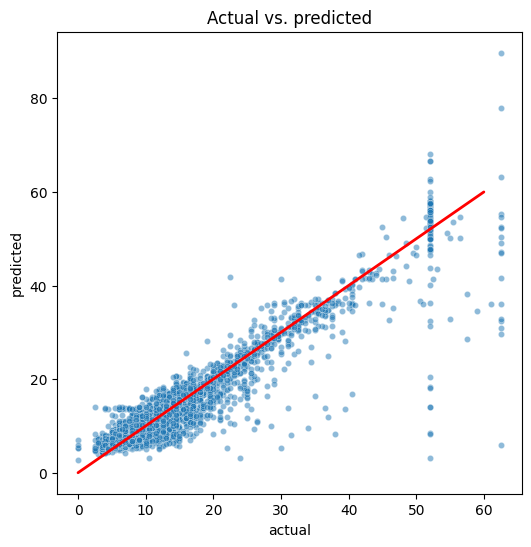

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual', y='predicted',data=results, s=20, alpha=0.5, ax=ax)
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted')

Text(0, 0.5, 'count')

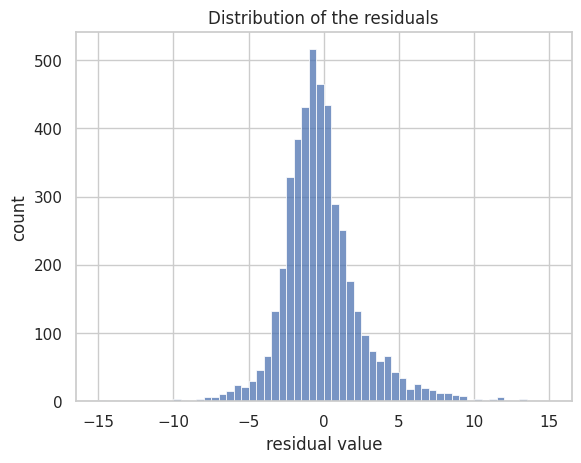

In [ ]:
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count')

In [ ]:
results['residual'].mean()

np.float64(0.030830850977889873)

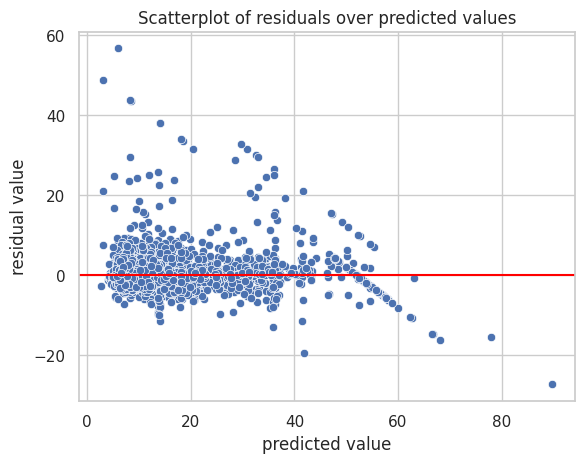

In [ ]:
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which you know are the imputed maximum of \$62.50 and the flat rate of \$52 for JFK airport trips.

In [ ]:
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.030825,7.133867,2.812115,0.110233,-0.054373


The coefficients reveal that `mean_distance` was the feature with the greatest weight in the model's final prediction. Be careful here! A common misinterpretation is that for every mile traveled, the fare amount increases by a mean of \$7.13. This is incorrect. Remember, the data used to train the model was standardized with `StandardScaler()`. As such, the units are no longer miles. In other words, you cannot say \"for every mile traveled...\", as stated above. The correct interpretation of this coefficient is: controlling for other variables, *for every +1 change in standard deviation*, the fare amount increases by a mean of \$7.13.

Note also that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

So, translate this back to miles instead of standard deviation (i.e., unscale the data).

In [ ]:
print(X_train['mean_distance'].std())
print(7.133867 / X_train['mean_distance'].std())

3.574812975256415
1.9955916713344426


Now you can make a more intuitive interpretation: for every 3.57 miles traveled, the fare increased by a mean of \$7.13. Or, reduced: for every 1 mile traveled, the fare increased by a mean of \$2.00.